#### EDA And Feature Engineering Of Google Play Store Dataset: 
1) Problem statement. Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc. 2) Data Collection.

The data consists of 20 column and 10841 rows.

Steps We Are Going to Follow
Data Clearning
Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# 1.cheak missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# observations: 
         # data set have missing values

In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [9]:
#2.Encoding with Reviews( here all numeric but in string so convert in int)
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [10]:
# df['Reviews']=df['Reviews'].astype(int) # error : invalid literal for int() with base 10: '3.0M' ,,it means there are presernt int the Reviews columnm '3.0M'

In [11]:
df['Reviews'].str.isnumeric().sum()       # means 10840 Reviews are string nummeric but 1 Rewviews in not in the form of str numeric form

10840

In [12]:
df[~df['Reviews'].str.isnumeric()]      # ~ means not numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Here we can remove this datapoint(because it is only one can't be effect on 10k datapoints)
                                          or
we can convert 3.0M to 3 it's your choice,,i am deleting here

In [13]:
df_copy=df.copy()

In [14]:
df_copy.index[10472]

10472

In [15]:
df_copy=df_copy.drop(df_copy.index[10472])

In [16]:
df_copy.shape

(10840, 13)

In [17]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [18]:
df_copy[~df_copy['Reviews'].str.isnumeric()]      # it means all are in str num formart

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [21]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [22]:
#3. data encodig with Size colummn  ,,, convert in kb
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [23]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

'''
The first two lines of code use .str.replace() because they are designed to perform string-level 
operations on each element of the 'Size' column individually. Specifically, you are replacing
characters in the string representation of sizes (such as 'M' and 'k') with appropriate values. 
This is necessary when dealing with textual representations of sizes.

On the other hand, the last two lines utilize .replace() and .astype(float) for broader column-level operations.
Instead of focusing on individual characters within each string, these operations are applied to the 
entire 'Size' column.
'''

"\nThe first two lines of code use .str.replace() because they are designed to perform string-level \noperations on each element of the 'Size' column individually. Specifically, you are replacing\ncharacters in the string representation of sizes (such as 'M' and 'k') with appropriate values. \nThis is necessary when dealing with textual representations of sizes.\n\nOn the other hand, the last two lines utilize .replace() and .astype(float) for broader column-level operations.\nInstead of focusing on individual characters within each string, these operations are applied to the \nentire 'Size' column.\n"

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [25]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [26]:
# 4 installs and Price column
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [27]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [28]:
char_to_remove=[',','+','$']
colum_to_clean=['Installs','Price']
for item in char_to_remove:
    for cols in colum_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [29]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [30]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [31]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [33]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [34]:
#5. Last Updated colulmn
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [35]:
pd.to_datetime(df_copy['Last Updated']) #Convert argument to datetime.

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [36]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [37]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [38]:
df_copy.drop('Last Updated',axis=1,inplace=True)

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Day             10840 non-null  int32  
 13  Month           10840 non-null  int32  
 14  Year            10840 non-null  int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1.1+ MB


In [40]:
# 6.Content Rating  OHE
df_copy['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [41]:
df_copy['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df_copy[['Content Rating']])
encoded_df=pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())
# encoded_df=pd.DataFrame(encoded.toarray(), columns=['Content Rating_Adults only 18+','Content Rating_Everyone',	'Content Rating_Everyone 10+'	,'Content Rating_Mature 17+',	'Content Rating_Teen'	,'Content Rating_Unrated'])

In [43]:
encoded_df

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10835,0.0,1.0,0.0,0.0,0.0,0.0
10836,0.0,1.0,0.0,0.0,0.0,0.0
10837,0.0,1.0,0.0,0.0,0.0,0.0
10838,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
df_copy=pd.concat([df_copy,encoded_df],axis=1)

'''
Additionally, if the data types of the columns in the two DataFrames are different, pandas will try to convert them to a common data type. 
For example, if one DataFrame has a column with integers and the other has the same column name with floats, pandas may convert the entire
 column to a common data type that can accommodate both integers and floats, such as converting everything to floats.

'''

'\nAdditionally, if the data types of the columns in the two DataFrames are different, pandas will try to convert them to a common data type. \nFor example, if one DataFrame has a column with integers and the other has the same column name with floats, pandas may convert the entire\n column to a common data type that can accommodate both integers and floats, such as converting everything to floats.\n\n'

In [45]:
df_copy.drop('Content Rating',axis=1,inplace=True)

In [46]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10472
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             10840 non-null  object 
 1   Category                        10840 non-null  object 
 2   Rating                          9366 non-null   float64
 3   Reviews                         10840 non-null  float64
 4   Size                            9145 non-null   float64
 5   Installs                        10840 non-null  float64
 6   Type                            10839 non-null  object 
 7   Price                           10840 non-null  float64
 8   Genres                          10840 non-null  object 
 9   Current Ver                     10832 non-null  object 
 10  Android Ver                     10838 non-null  object 
 11  Day                             10840 non-null  float64
 12  Month                           10840

In [47]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


EDA

In [48]:
df_copy[df_copy.duplicated()].shape

(483, 20)

In [49]:
df_copy[df_copy.duplicated('App')].shape

(1181, 20)

####  Observation
dataset have duplicate datapoints

In [50]:
df_copy=df_copy.drop_duplicates(subset='App',keep='first')   #Return DataFrame with duplicate rows removed.

In [51]:
df_copy[df_copy.duplicated('App')].shape

(0, 20)

In [52]:
# lets go ahead and explore more data: 
numeric_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']

print("we have {} numerical features: {}".format(len(numeric_feature),numeric_feature))
print("we have {} categorical features: {}".format(len(categorical_feature),categorical_feature))

we have 14 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year', 'Content Rating_Adults only 18+', 'Content Rating_Everyone', 'Content Rating_Everyone 10+', 'Content Rating_Mature 17+', 'Content Rating_Teen', 'Content Rating_Unrated']
we have 6 categorical features: ['App', 'Category', 'Type', 'Genres', 'Current Ver', 'Android Ver']


In [53]:
len(list(numeric_feature))

14

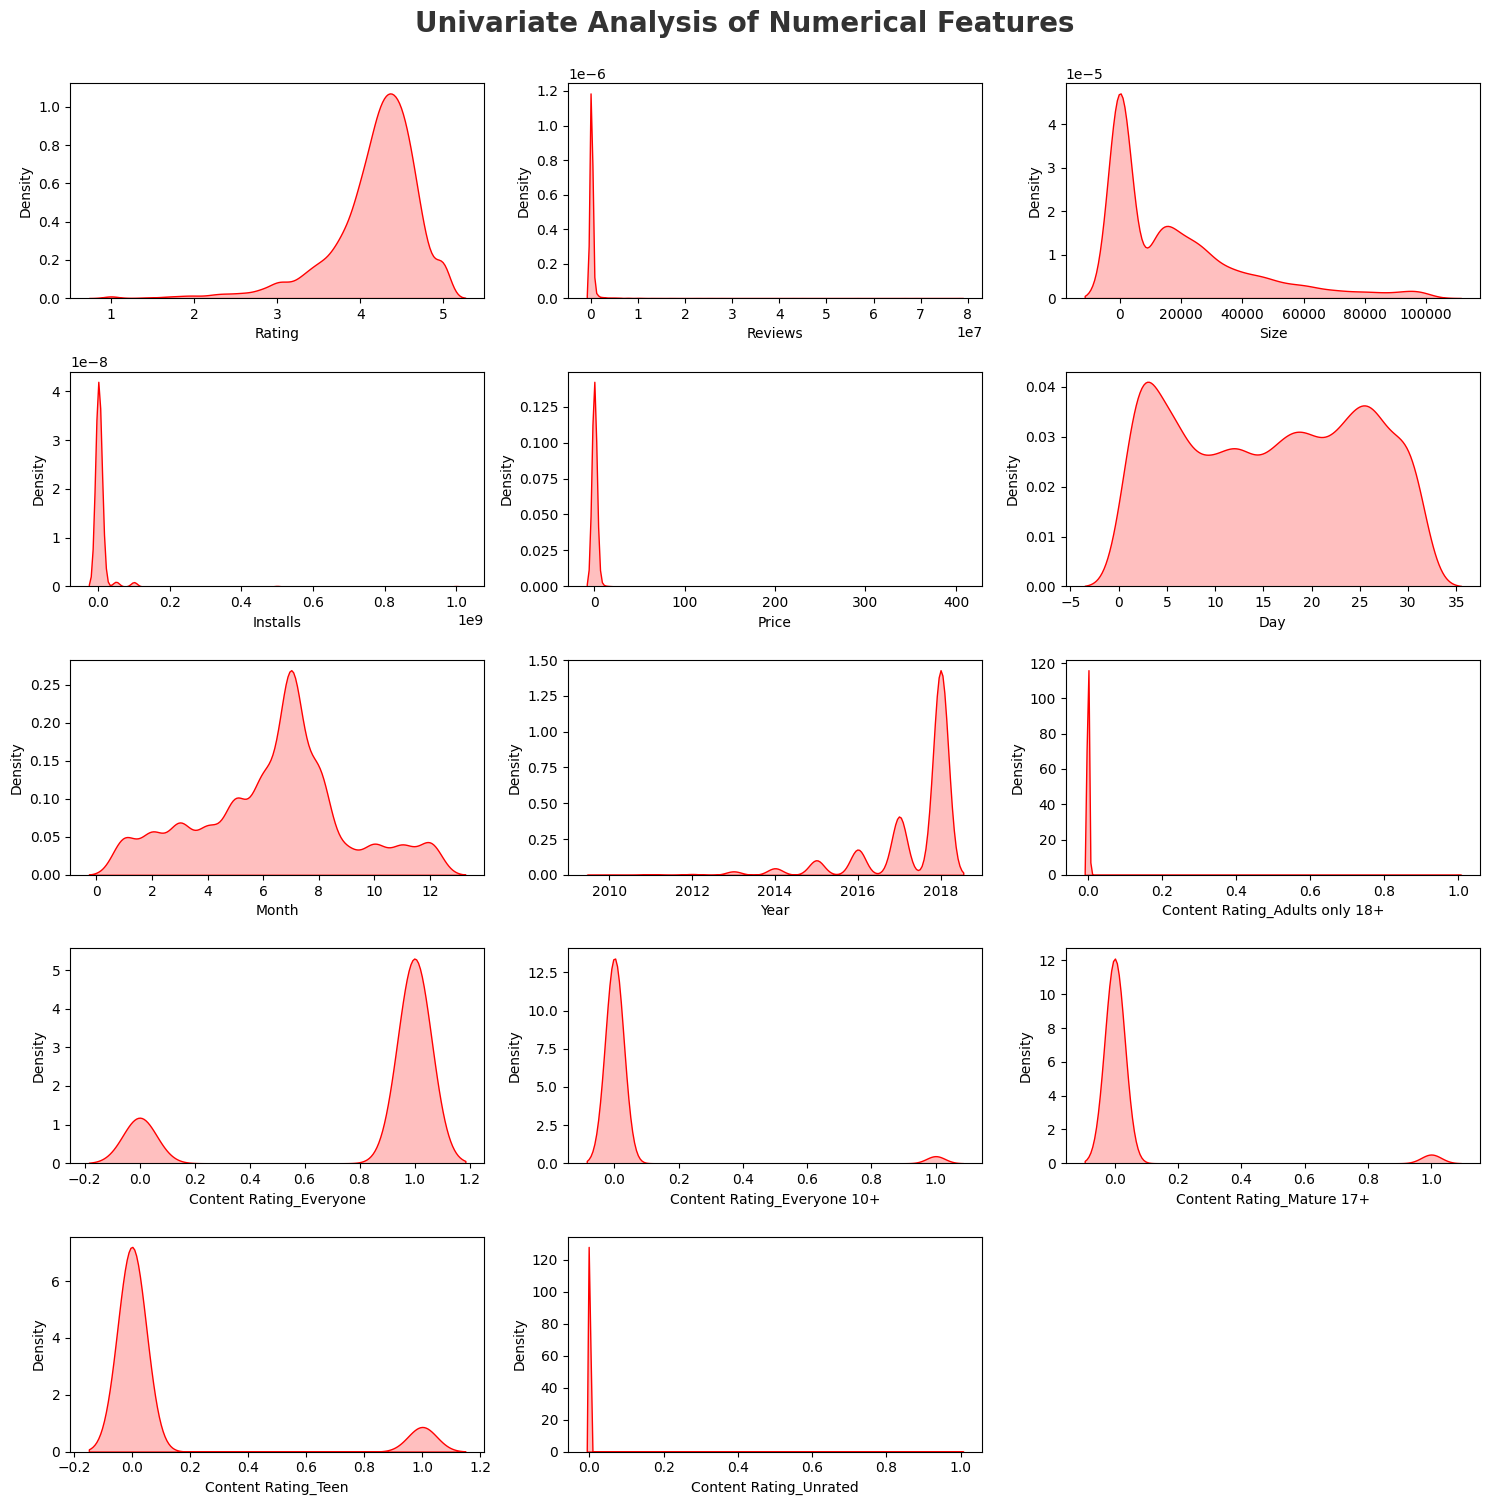

In [54]:
## Visualization Diagrams

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
# alpha: This parameter takes a value between 0 (completely transparent) and 1 (completely opaque). In this case, it is set to 0.8, meaning that the title will be 80% opaque, allowing some degree of transparency.
# y: This parameter controls the vertical position of the title along the y-axis. A value of 1 means the title will be at the top of the figure, and 0 would place it at the bottom. Values between 0 and 1 would position the title proportionally within the figure height.
for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]],shade=True, color='r')  # The shade=True argument fills the area under the curve, and color='r' sets the color of the curve to red.
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()        #plt.tight_layout(): This adjusts the spacing between subplots to prevent overlapping.

#### Observations: 
Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

In [55]:
categorical_feature

['App', 'Category', 'Type', 'Genres', 'Current Ver', 'Android Ver']

'\npalette="Set2": This parameter in the sns.countplot() function specifies the color palette to be used for coloring\nthe bars in the count plot. In this case, "Set2" is the name of a predefined color palette available in Seaborn, \na data visualization library in Python. The "Set2" palette consists of a set of distinct colors suitable for \ndifferent categories in the plot. It ensures that each category or bar in the count plot has a unique and \nvisually distinguishable color.\n\nplt.xticks(rotation=45): This line, when used after creating the count plot, modifies the orientation of the\nx-axis tick labels. plt.xticks() is a function from Matplotlib, and rotation=45 is a parameter that specifies \nthe angle by which the x-axis tick labels will be rotated. In this case, rotation=45 rotates the x-axis tick \nlabels by 45 degrees clockwise, making the labels more readable when they are long or when there are many categories,\npreventing overlap between the labels.\n'

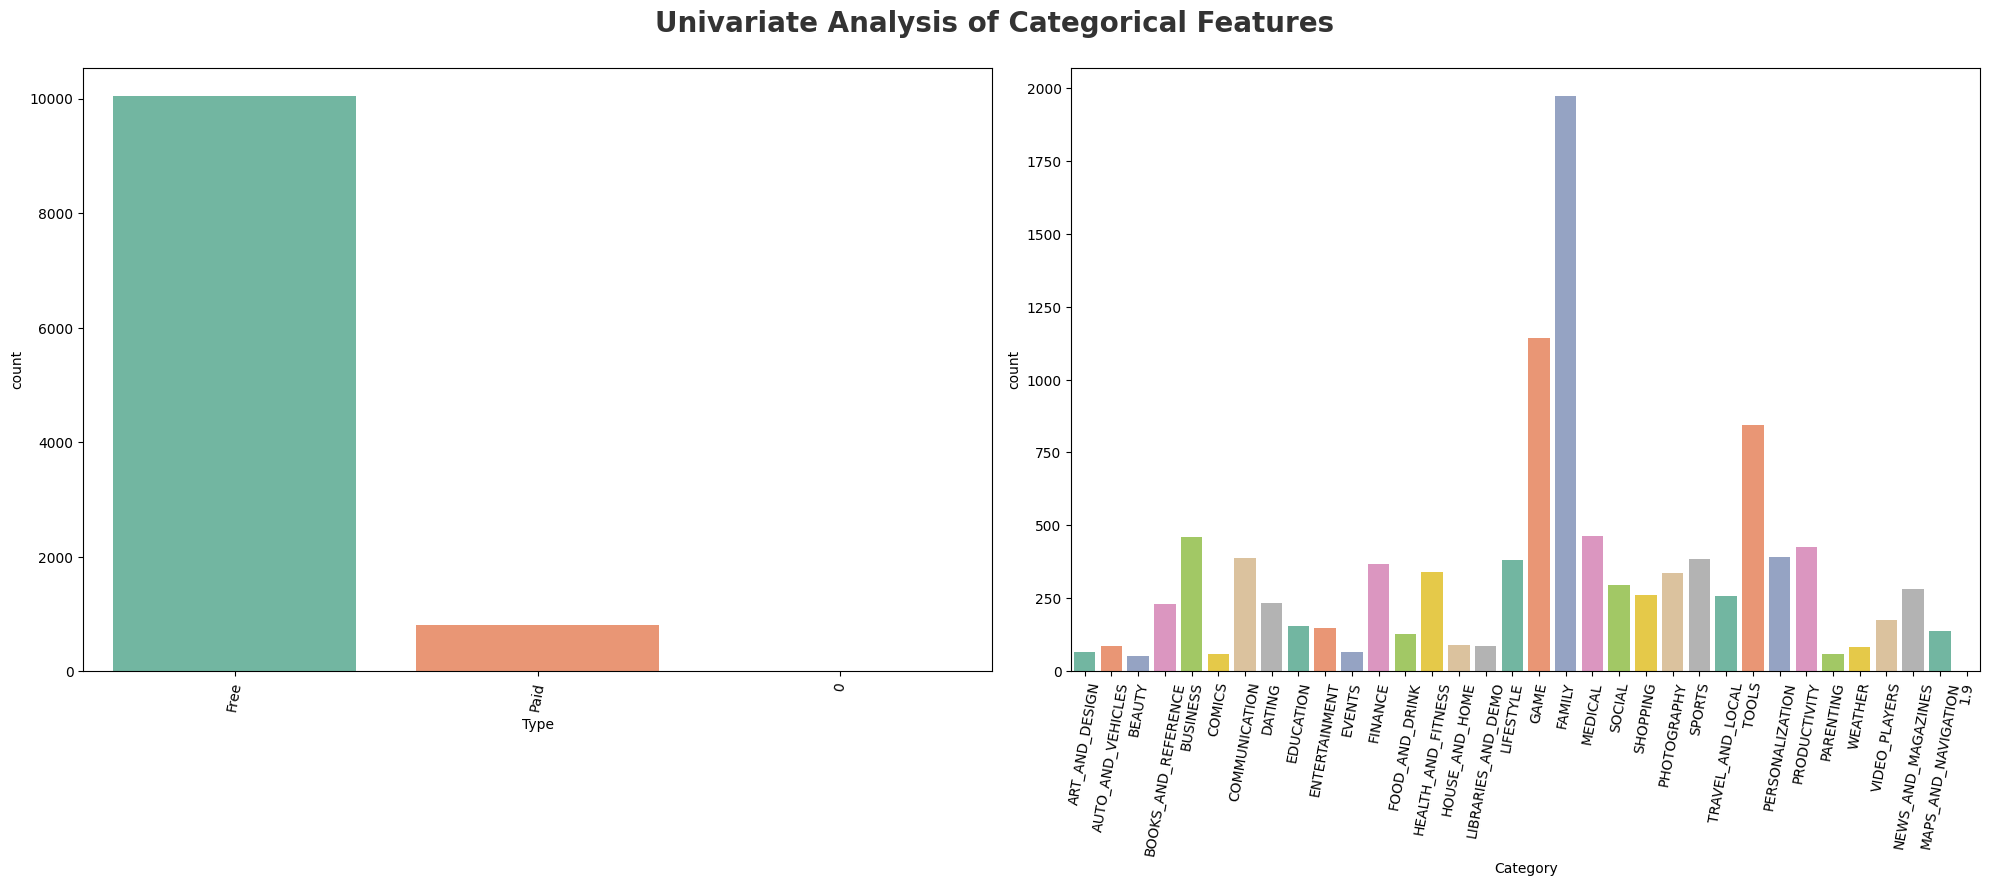

In [56]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type','Category']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=80)
    plt.tight_layout()


'''
palette="Set2": This parameter in the sns.countplot() function specifies the color palette to be used for coloring
the bars in the count plot. In this case, "Set2" is the name of a predefined color palette available in Seaborn, 
a data visualization library in Python. The "Set2" palette consists of a set of distinct colors suitable for 
different categories in the plot. It ensures that each category or bar in the count plot has a unique and 
visually distinguishable color.

plt.xticks(rotation=45): This line, when used after creating the count plot, modifies the orientation of the
x-axis tick labels. plt.xticks() is a function from Matplotlib, and rotation=45 is a parameter that specifies 
the angle by which the x-axis tick labels will be rotated. In this case, rotation=45 rotates the x-axis tick 
labels by 45 degrees clockwise, making the labels more readable when they are long or when there are many categories,
preventing overlap between the labels.
'''

Q 1.which is the most popular app categary of the App?

In [57]:
df_copy['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

<Axes: ylabel='count'>

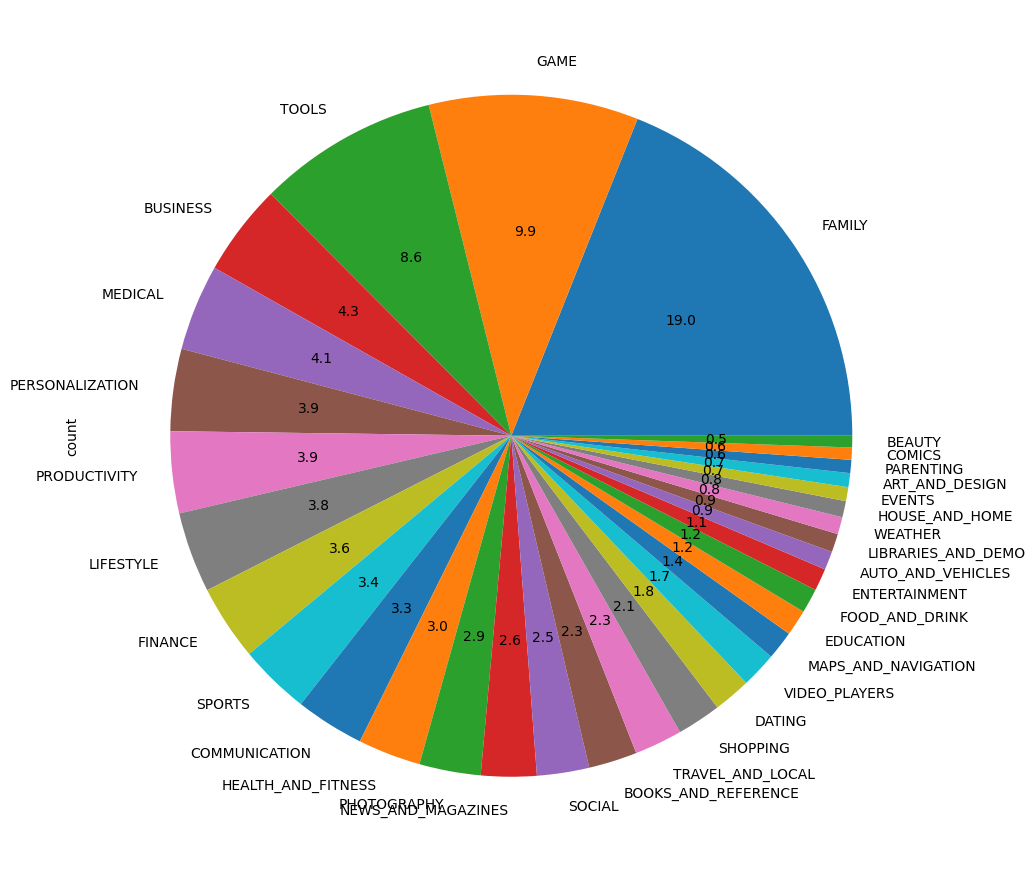

In [58]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(11,12),autopct='%1.1f')

#autopct='%1.1f': This parameter formats the display of the numerical values on the pie chart to show percentages with one decimal place. The '%1.1f' format specifies that each percentage should be displayed with one digit after the decimal point.

#### Observations: 
1.There are more kinds of apps in playstore which are under category of family, games & tools<br>
2.Beatuty,comics,arts and weather kinds of apps are very less in playstore<br>
3.most popular category of app is family 

Q.2.find out the top 10 App categary.

In [59]:
category = pd.DataFrame(df_copy[['Category','Installs']])        #Dataframe of apps on the basis of category

In [60]:
## Top 10 App Categories
category= pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category

In [61]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


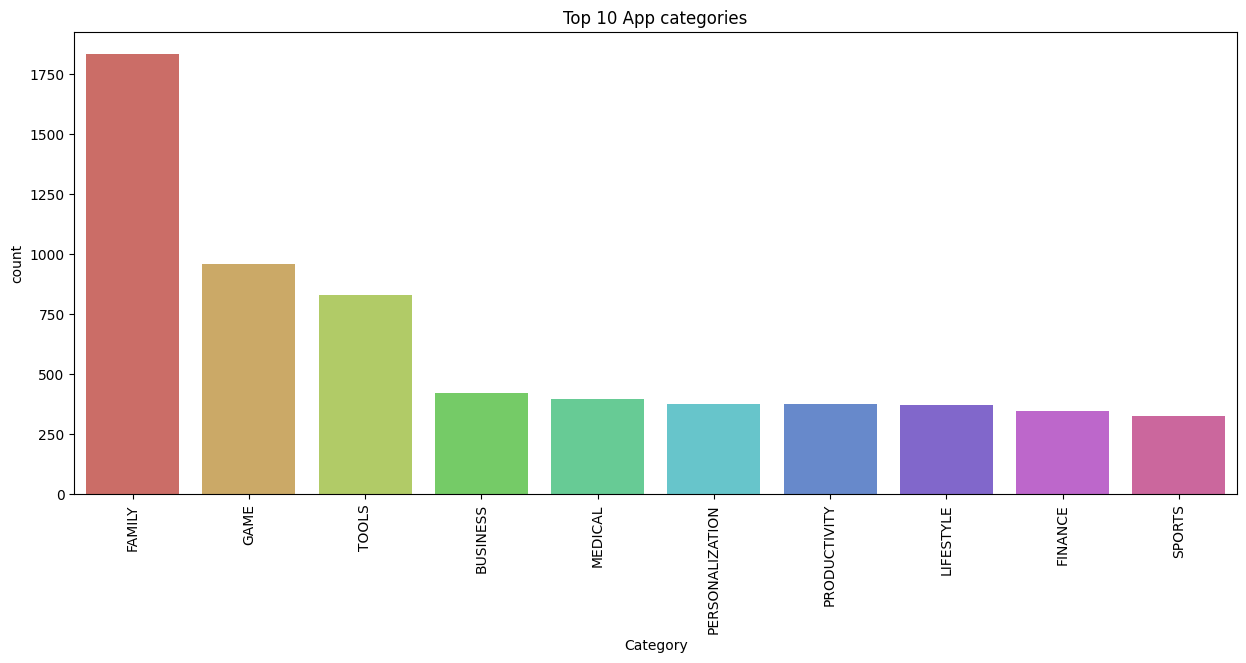

In [62]:
# top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [63]:
category.index[:10]

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS'],
      dtype='object', name='Category')

#### Insights:<br> 
Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.<br>
Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

#### Internal Assignments: <br>
1.Which Category has largest number of installations??<br>
2.What are the Top 5 most installed Apps in Each popular Categories ??<br>
3.How many apps are there on Google Play Store which get 5 ratings??<br>

Text(0.5, 1.0, 'Most popular categories in play store')

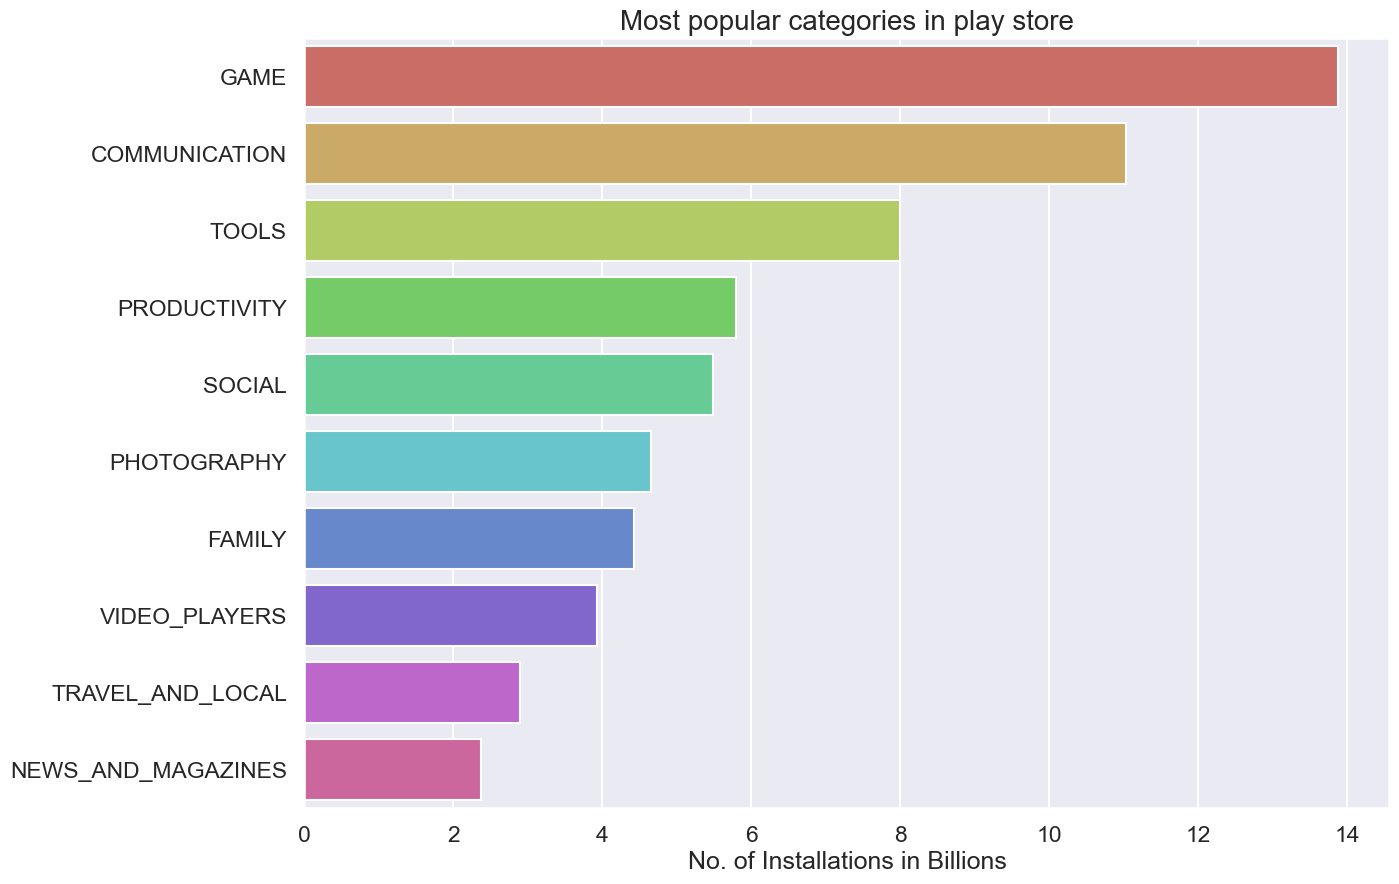

In [64]:
df_cat_installs=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_installs.Installs=df_cat_installs.Installs/1000000000 # converting into billions
df2=df_cat_installs.head(10)
plt.figure(figsize=(14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax=sns.barplot(x='Installs',y='Category',data=df2,palette='hls')
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most popular categories in play store",size=20)

In [65]:
df_copy.groupby(['Category'])['Installs'].sum()

Category
ART_AND_DESIGN         1.143381e+08
AUTO_AND_VEHICLES      5.313021e+07
BEAUTY                 2.719705e+07
BOOKS_AND_REFERENCE    1.665970e+09
BUSINESS               6.971649e+08
COMICS                 4.498115e+07
COMMUNICATION          1.103828e+10
DATING                 1.409261e+08
EDUCATION              3.529520e+08
ENTERTAINMENT          2.113660e+09
EVENTS                 1.597316e+07
FAMILY                 4.427942e+09
FINANCE                4.553487e+08
FOOD_AND_DRINK         2.117988e+08
GAME                   1.387892e+10
HEALTH_AND_FITNESS     1.144023e+09
HOUSE_AND_HOME         9.721246e+07
LIBRARIES_AND_DEMO     5.299591e+07
LIFESTYLE              5.038235e+08
MAPS_AND_NAVIGATION    5.032819e+08
MEDICAL                3.819318e+07
NEWS_AND_MAGAZINES     2.369218e+09
PARENTING              3.152111e+07
PERSONALIZATION        1.532495e+09
PHOTOGRAPHY            4.649148e+09
PRODUCTIVITY           5.793091e+09
SHOPPING               1.400349e+09
SOCIAL             

In [66]:
df_cat_installs=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=True).reset_index()

In [67]:
df_cat_installs

,Category,Installs
0,EVENTS,1.597316e+07
1,BEAUTY,2.719705e+07
2,PARENTING,3.152111e+07
3,MEDICAL,3.819318e+07
4,COMICS,4.498115e+07
5,LIBRARIES_AND_DEMO,5.299591e+07
6,AUTO_AND_VEHICLES,5.313021e+07
7,HOUSE_AND_HOME,9.721246e+07
8,ART_AND_DESIGN,1.143381e+08
9,DATING,1.409261e+08


In [68]:
df_cat_installs.Installs=df_cat_installs.Installs/1000000000  # converting into billions

In [69]:
df2=df_cat_installs.head(10)

In [70]:
df2

,Category,Installs
0,EVENTS,0.015973
1,BEAUTY,0.027197
2,PARENTING,0.031521
3,MEDICAL,0.038193
4,COMICS,0.044981
5,LIBRARIES_AND_DEMO,0.052996
6,AUTO_AND_VEHICLES,0.053130
7,HOUSE_AND_HOME,0.097212
8,ART_AND_DESIGN,0.114338
9,DATING,0.140926


In [71]:
len(df_copy[df_copy['Rating']==5])     # 271 app have 5 rating

271

In [72]:
df_copy_having_5_rating=df_copy[df_copy['Rating']==5]

In [73]:
df_copy_having_5_rating['App']

329                    Hojiboy Tojiboyev Life Hacks
612                   American Girls Mobile Numbers
615                                    Awake Dating
633                           Spine- The dating app
636      Girls Live Talk - Free Text and Video Chat
                            ...                    
10721                             Mad Dash Fo' Cash
10742                         GKPB FP Online Church
10776                              Monster Ride Pro
10820                               Fr. Daoud Lamei
10837              Fr. Mike Schmitz Audio Teachings
Name: App, Length: 271, dtype: object

### what is groupby function


In [101]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Art & Design,1.2.4,4.0.3 and up,1.0,8.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
cat=df_copy.groupby('Category')

In [79]:
cat

In [81]:
len(df_copy)       # no of raws

9660

In [82]:
len(cat)     # 33 different category

33

In [84]:
cat.size()

Category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1832
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
dtype: int64

In [85]:
cat.size().sort_values(ascending=False)


Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
dtype: int64

In [86]:
cat.first()  #First non-null of values within each group 

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
Category,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0,19000.0,1.000000e+04,Free,0.00,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
AUTO_AND_VEHICLES,Monster Truck Stunt 3D 2019,4.2,367.0,25000.0,1.000000e+05,Free,0.00,Auto & Vehicles,1.0,4.0.3 and up,10.0,5.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
BEAUTY,Hush - Beauty for Everyone,4.7,18900.0,17000.0,5.000000e+05,Free,0.00,Beauty,6.10.1,5.0 and up,2.0,8.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
BOOKS_AND_REFERENCE,Wattpad 📖 Free Books,4.6,2914724.0,4.9,1.000000e+08,Free,0.00,Books & Reference,Varies with device,Varies with device,1.0,8.0,2018.0,0.0,0.0,0.0,0.0,1.0,0.0
BUSINESS,Visual Voicemail by MetroPCS,4.1,16129.0,29000.0,1.000000e+07,Free,0.00,Business,Varies with device,Varies with device,30.0,7.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
COMICS,LINE WEBTOON - Free Comics,4.5,1013635.0,4.9,1.000000e+07,Free,0.00,Comics,Varies with device,Varies with device,31.0,7.0,2018.0,0.0,0.0,0.0,0.0,1.0,0.0
COMMUNICATION,Messenger – Text and Video Chat for Free,4.0,56642847.0,17000.0,1.000000e+09,Free,0.00,Communication,Varies with device,Varies with device,1.0,8.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
DATING,"Moco+ - Chat, Meet People",4.2,1545.0,6.2,1.000000e+04,Paid,3.99,Dating,2.6.139,4.1 and up,19.0,6.0,2018.0,0.0,0.0,0.0,1.0,0.0,0.0
EDUCATION,Duolingo: Learn Languages Free,4.7,6289924.0,18000.0,1.000000e+08,Free,0.00,Education;Education,Varies with device,Varies with device,1.0,8.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
cat.last()  # Last non-null of values within each group

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
Category,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0,1.0,2.9,100.0,Free,0.00,Art & Design,1.0.2,4.0 and up,18.0,4.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
AUTO_AND_VEHICLES,FR Plus 1.6,4.6,4.0,3.9,100.0,Free,0.00,Auto & Vehicles,1.3.6,4.4W and up,24.0,7.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
BEAUTY,Female Daily,3.9,4354.0,42000.0,100000.0,Free,0.00,Beauty,2.5.1,4.0.3 and up,6.0,8.0,2018.0,0.0,0.0,0.0,0.0,1.0,0.0
BOOKS_AND_REFERENCE,The SCP Foundation DB fr nn5n,4.5,114.0,619.0,1000.0,Free,0.00,Books & Reference,Varies with device,Varies with device,19.0,1.0,2015.0,0.0,1.0,0.0,0.0,0.0,0.0
BUSINESS,FR Forms,4.8,0.0,9.6,10.0,Free,0.00,Business,1.1.5,4.0 and up,29.0,9.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0
COMICS,Manga-FR - Anime Vostfr,3.4,291.0,13000.0,10000.0,Free,0.00,Comics,2.0.1,4.0 and up,15.0,5.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0
COMMUNICATION,HipChat - beta version,4.1,1035.0,20000.0,50000.0,Free,0.00,Communication,3.20.001,4.1 and up,7.0,8.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
DATING,"FEABIE: Feedees, BBW, BHM & FA",3.7,1212.0,11000.0,100000.0,Free,0.00,Dating,4.4.1,4.1 and up,16.0,2.0,2018.0,0.0,0.0,0.0,1.0,0.0,0.0
EDUCATION,Toca Life: Hospital,4.7,3528.0,24000.0,100000.0,Paid,3.99,Education;Pretend Play,1.1.1-play,4.4 and up,12.0,6.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


In [89]:
cat.groups  #Dict {group name -> group labels}

{'ART_AND_DESIGN': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 3982, 4193, 4749, 4755, 4759, 4764, 5179, 5254, 5258, 6930, 7174, 8679, 8712, 8871, 8888], 'AUTO_AND_VEHICLES': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 4120, 4216, 4376, 4622, 4697, 5015, 5023, 5101, 5247, 5310, 6129, 6151, 6160, 6226, 6245, 6468, 7183, 7341, 7419, 7511, 7790, 7801, 8289, 8866, 8934, 9713, 9951, 9956, 9959, 9964, 10130, 10137, 10345, 10486, 10764, 10811], 'BEAUTY': [98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 5192, 5998, 6222, 6318, 6506, 6828, 7021, 7460, 

In [91]:
df_copy.iloc[44,:]   #Purely integer-location based indexing for selection by position.

App                               Popsicle Sticks and Similar DIY Craft Ideas
Category                                                       ART_AND_DESIGN
Rating                                                                    4.2
Reviews                                                                  26.0
Size                                                                  12000.0
Installs                                                              10000.0
Type                                                                     Free
Price                                                                     0.0
Genres                                                           Art & Design
Current Ver                                                             1.0.0
Android Ver                                                        4.1 and up
Day                                                                       3.0
Month                                                           

In [93]:
cat.get_group('ART_AND_DESIGN')     # Construct DataFrame from group with provided name.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Art & Design,1.2.4,4.0.3 and up,1.0,8.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Art & Design,Varies with device,4.2 and up,8.0,6.0,2018.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Art & Design;Creativity,1.1,4.4 and up,20.0,6.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,Easy DIY CD Craft Ideas,ART_AND_DESIGN,NaN,7.0,5.6,5000.0,Free,0.0,Art & Design,1.0,2.3 and up,30.0,5.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
8679,Dp for girls,ART_AND_DESIGN,4.2,175.0,8.2,50000.0,Free,0.0,Art & Design,1.2,4.0.3 and up,26.0,5.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0
8712,Name Art DP - Focus n Filter Text 2018,ART_AND_DESIGN,4.3,132.0,7.7,10000.0,Free,0.0,Art & Design,1,4.1 and up,4.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0.0,1.2,0.0,Free,0.0,Art & Design,4.0,4.2 and up,14.0,3.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0


In [94]:
cat.get_group('ART_AND_DESIGN').shape        # how many datapointspresent in ART_AND_DESIGN group on numeric

(64, 20)

In [96]:
cat.sum()      # apply sum on all the group by object

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
Category,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook...,265.8,1419203.0,587180.0,1.143381e+08,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,5.97,Art & DesignArt & Design;Pretend PlayArt & Des...,1.0.02.0.01.2.4Varies with device1.11.01.16.1....,4.0.3 and up4.0.3 and up4.0.3 and up4.2 and up...,1113.0,379.0,129140.0,0.0,60.0,1.0,0.0,3.0,0.0
AUTO_AND_VEHICLES,Monster Truck Stunt 3D 2019Real Tractor Farmin...,305.9,1163666.0,1344244.7,5.313021e+07,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,13.47,Auto & VehiclesAuto & VehiclesAuto & VehiclesA...,1.011.03.0Varies with device3.04.01.7.12.5.13....,4.0.3 and up4.1 and up4.1 and upVaries with de...,1481.0,552.0,171513.0,0.0,82.0,1.0,1.0,1.0,0.0
BEAUTY,"Hush - Beauty for Everyoneipsy: Makeup, Beauty...",179.7,396240.0,514134.4,2.719705e+07,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,0.00,BeautyBeautyBeautyBeautyBeautyBeautyBeautyBeau...,6.10.12.3.04.01.0.6Varies with device1.61.91.1...,5.0 and up4.1 and up4.1 and up4.0.3 and upVari...,832.0,322.0,106940.0,0.0,45.0,2.0,3.0,3.0,0.0
BOOKS_AND_REFERENCE,Wattpad 📖 Free BooksE-Book Read - Read Book fo...,734.3,16721314.0,1972907.8,1.665970e+09,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,119.77,Books & ReferenceBooks & ReferenceBooks & Refe...,Varies with device1.3.21.1Varies with deviceVa...,Varies with device4.4 and up4.0 and upVaries w...,3680.0,1406.0,447764.0,0.0,197.0,4.0,2.0,19.0,0.0
BUSINESS,Visual Voicemail by MetroPCSIndeed Job SearchU...,1077.9,9890245.0,4237842.2,6.971649e+08,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,175.29,BusinessBusinessBusinessBusinessBusinessBusine...,Varies with deviceVaries with deviceVaries wit...,Varies with deviceVaries with deviceVaries wit...,6747.0,2601.0,847269.0,0.0,403.0,1.0,1.0,15.0,0.0
COMICS,LINE WEBTOON - Free ComicsManga Master - Best ...,225.8,2342071.0,571157.9,4.498115e+07,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,0.00,ComicsComicsComicsComicsComics;CreativityComic...,Varies with device1.1.7.02.11.31.081.0.61.0.81...,Varies with device4.1 and up4.1 and up4.0.3 an...,927.0,381.0,112995.0,2.0,26.0,3.0,6.0,19.0,0.0
COMMUNICATION,Messenger – Text and Video Chat for FreeWhatsA...,1055.1,285811368.0,2225109.8,1.103828e+10,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,83.14,CommunicationCommunicationCommunicationCommuni...,Varies with deviceVaries with device1.8.9Varie...,Varies with deviceVaries with device4.1 and up...,4916.0,2034.0,635452.0,0.0,278.0,0.0,10.0,27.0,0.0
DATING,"Moco+ - Chat, Meet PeopleCalculatorTruth or Da...",532.0,3623544.0,2062446.1,1.409261e+08,PaidPaidPaidPaidPaidPaidFreeFreeFreeFreeFreeFr...,27.44,DatingDatingDatingDatingDatingDatingDatingDati...,2.6.1391.1.61.01.0.11.21.0.1Varies with device...,4.1 and up4.0 and up4.0 and up4.0 and up4.0.3 ...,2878.0,1149.0,345059.0,0.0,17.0,0.0,145.0,9.0,0.0
EDUCATION,Duolingo: Learn Languages FreeTEDEnglish Commu...,515.0,13364148.0,1539239.0,3.529520e+08,FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...,17.96,Education;EducationEducationEducationEducation...,Varies with device3.2.53.15.0.01.94.91.51.2.81...,Varies with device4.1 and up4.0 and up4.1 and ...,2058.0,850.0,240066.0,0.0,112.0,3.0,3.0,1.0,0.0


In [99]:
cat['Size'].mean()         # apply mean of Size on groupby object

Category
ART_AND_DESIGN          9470.645161
AUTO_AND_VEHICLES      17923.262667
BEAUTY                 10939.029787
BOOKS_AND_REFERENCE    10169.627835
BUSINESS               11270.856915
COMICS                 11656.283673
COMMUNICATION           9194.668595
DATING                 12971.359119
EDUCATION              17294.820225
ENTERTAINMENT          21595.200000
EVENTS                 11587.185965
FAMILY                 25499.237949
FINANCE                15361.106020
FOOD_AND_DRINK         19171.778409
GAME                   41276.020733
HEALTH_AND_FITNESS     18166.609052
HOUSE_AND_HOME         12836.298387
LIBRARIES_AND_DEMO      9124.116049
LIFESTYLE              12414.714072
MAPS_AND_NAVIGATION    13830.474766
MEDICAL                17477.526087
NEWS_AND_MAGAZINES      9616.329353
PARENTING              20113.512963
PERSONALIZATION         8575.708547
PHOTOGRAPHY            13128.607658
PRODUCTIVITY            9888.604124
SHOPPING               13336.448810
SOCIAL             

In [100]:
cat['Size'].mean().sort_values(ascending=False)

Category
GAME                   41276.020733
FAMILY                 25499.237949
TRAVEL_AND_LOCAL       22708.220231
SPORTS                 22393.010877
ENTERTAINMENT          21595.200000
PARENTING              20113.512963
FOOD_AND_DRINK         19171.778409
HEALTH_AND_FITNESS     18166.609052
AUTO_AND_VEHICLES      17923.262667
MEDICAL                17477.526087
EDUCATION              17294.820225
FINANCE                15361.106020
MAPS_AND_NAVIGATION    13830.474766
VIDEO_PLAYERS          13457.298425
SHOPPING               13336.448810
SOCIAL                 13292.604233
PHOTOGRAPHY            13128.607658
DATING                 12971.359119
HOUSE_AND_HOME         12836.298387
LIFESTYLE              12414.714072
COMICS                 11656.283673
EVENTS                 11587.185965
BUSINESS               11270.856915
BEAUTY                 10939.029787
BOOKS_AND_REFERENCE    10169.627835
WEATHER                10102.258929
PRODUCTIVITY            9888.604124
NEWS_AND_MAGAZINES 

In [107]:
df_copy.groupby('Category')['Size'].mean().sort_values(ascending=False)

Category
GAME                   41276.020733
FAMILY                 25499.237949
TRAVEL_AND_LOCAL       22708.220231
SPORTS                 22393.010877
ENTERTAINMENT          21595.200000
PARENTING              20113.512963
FOOD_AND_DRINK         19171.778409
HEALTH_AND_FITNESS     18166.609052
AUTO_AND_VEHICLES      17923.262667
MEDICAL                17477.526087
EDUCATION              17294.820225
FINANCE                15361.106020
MAPS_AND_NAVIGATION    13830.474766
VIDEO_PLAYERS          13457.298425
SHOPPING               13336.448810
SOCIAL                 13292.604233
PHOTOGRAPHY            13128.607658
DATING                 12971.359119
HOUSE_AND_HOME         12836.298387
LIFESTYLE              12414.714072
COMICS                 11656.283673
EVENTS                 11587.185965
BUSINESS               11270.856915
BEAUTY                 10939.029787
BOOKS_AND_REFERENCE    10169.627835
WEATHER                10102.258929
PRODUCTIVITY            9888.604124
NEWS_AND_MAGAZINES 

In [108]:
#Thanks